             Adj Close  Prediction
Date                              
2019-08-30  208.740005         NaN
2019-09-03  205.699997         NaN
2019-09-04  209.190002         NaN
2019-09-05  213.279999         NaN
2019-09-06  213.259995         NaN
Confidence -- Linear Regression:  0.12029291097071615
[181.6497284  182.28656113 181.76715359 179.70758593 179.96954865
 179.25140889 179.55853869 179.64886653 181.00836372 179.09784375
 179.12494156 179.94696827 178.30743864 177.77448605 177.01569572
 177.09699595 178.99848104 178.44745146 177.54865602 178.21711079
 177.51703397 176.65436395 176.97504606 177.4944536  176.45112109
 177.83771608 175.74653318 175.01484792 175.09162345 175.83686102
 175.51166828 174.6354532  175.04194572 173.11787346 175.20002784
 177.19184123 182.0155708  180.36249612 179.44111304 177.45832817
 178.21545779 178.44668344 174.59752198 177.41751893 177.87542606
 175.71736027 173.97186133 173.96732984 172.93363429 173.01523828
 177.4673907  175.72189176 176.77825746 1

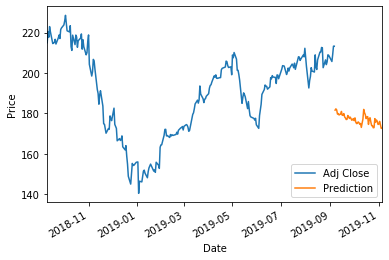

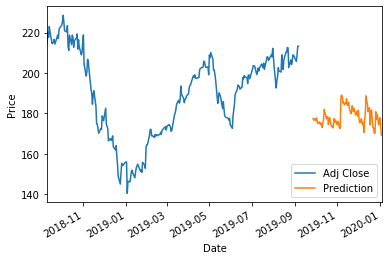

In [4]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing,svm
from sklearn.model_selection import cross_validate

#read the data
df = pd.read_csv('AAPL.csv')

#print the head
df.head()

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
#plt.figure(figsize=(16,8))
#plt.plot(df['Close'], label='Close Price history')

# Adjusted close price column for prediction
df = df[['Adj Close']]

# forecast_out variable is set to 60. Predicting 60 days into future
forecast_out = int(60) 
# new column Prediction which serve as label
df['Prediction'] = df[['Adj Close']].shift(-forecast_out) 

print(df.tail())

# Input X, contains only Adj Close values
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:] 
X = X[:-forecast_out] 
y = np.array(df['Prediction'])
y = y[:-forecast_out]

# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training using LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("Confidence -- Linear Regression: ", confidence)
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

# Quadratic Regression
clfquad = make_pipeline(PolynomialFeatures(2), Ridge())
clfquad.fit(X_train, y_train)
confidencequad = clfquad.score(X_test,y_test)

print("Confidence -- Quadratic Regression: ", confidencequad)

forecast_predictionR = clfquad.predict(X_forecast)
print(forecast_predictionR)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)
confidenceknn = clfknn.score(X_test, y_test)
print("Confidence -- KNN Regression: ", confidenceknn)

#Plot using matplotlib

last_date = df.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_prediction:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj Close'].tail(500).plot()
df['Prediction'].tail(100).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

for i in forecast_predictionR:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj Close'].tail(500).plot()
df['Prediction'].tail(100).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()